<a href="https://colab.research.google.com/github/colorfulparrot06/Model/blob/main/StudentDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What kind of student does bettter in school on average?
"better" at school is defined by grades

-a project that is given a student and catogerizes them with good, mediocore, and bad grades

-what type of students to well in school - are there any outside factors that determine such?
based on all the factos, scholarhsip, listen in class, etc, : does this student do well in school?


GOAL: Determine the grades of different kinds of students




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/


/content/drive/MyDrive/Github


In [ ]:
import numpy as np
import pandas as pd
#cleaning up dfata

In [ ]:
! pip install kaggle



In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download jacksondivakarr/student-classification-dataset

  0% 0.00/15.2k [00:00<?, ?B/s]
100% 15.2k/15.2k [00:00<00:00, 8.41MB/s]


In [ ]:
! kaggle datasets download -d jacksondivakarr/student-classification-dataset





student-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download *jacksondivakarr/student-classification-dataset* -p /content/student-classification-dataset --unzip




403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
'''
datasets/jacksondivakarr/student-classification-dataset
kaggle datasets download -d
'''
!kaggle datasets download jacksondivakarr/student-classification-dataset -p /content/sample_data/ --unzip




  0% 0.00/15.2k [00:00<?, ?B/s]
100% 15.2k/15.2k [00:00<00:00, 4.59MB/s]


In [ ]:
import csv

In [ ]:
df = pd.read_csv("/content/sample_data/student.csv")

In [ ]:
print(df)

     Unnamed: 0    Id  Student_Age     Sex High_School_Type Scholarship  \
0             0  5001           21    Male            Other         50%   
1             1  5002           20    Male            Other         50%   
2             2  5003           21    Male            State         50%   
3             3  5004           18  Female          Private         50%   
4             4  5005           22    Male          Private         50%   
..          ...   ...          ...     ...              ...         ...   
140         140  5141           22  Female            State         50%   
141         141  5142           18  Female            State         75%   
142         142  5143           18  Female          Private         75%   
143         143  5144           22  Female            State         75%   
144         144  5145           18  Female          Private        100%   

    Additional_Work Sports_activity Transportation  Weekly_Study_Hours  \
0               Yes      

In [ ]:
print(df.head())

   Unnamed: 0    Id  Student_Age     Sex High_School_Type Scholarship  \
0           0  5001           21    Male            Other         50%   
1           1  5002           20    Male            Other         50%   
2           2  5003           21    Male            State         50%   
3           3  5004           18  Female          Private         50%   
4           4  5005           22    Male          Private         50%   

  Additional_Work Sports_activity Transportation  Weekly_Study_Hours  \
0             Yes              No        Private                   0   
1             Yes              No        Private                   0   
2              No              No        Private                   2   
3             Yes              No            Bus                   2   
4              No              No            Bus                  12   

  Attendance Reading Notes Listening_in_Class Project_work Grade  
0     Always     Yes   Yes                 No           No   

# Performing EDA

Start of with EDA / cleaning the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df.shape

(145, 16)

145 observations and 16 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         145 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

In [ ]:
df.head()
df.tail()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
140,140,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,141,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,142,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,143,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB
144,144,5145,18,Female,Private,100%,No,No,Private,12,Always,Yes,No,Yes,No,BB


In [ ]:
df.describe().round(2)

,Unnamed: 0,Id,Student_Age,Weekly_Study_Hours
count,145.0,145.0,145.00,145.00
mean,72.0,5073.0,19.68,2.33
std,42.0,42.0,1.99,4.25
min,0.0,5001.0,18.00,0.00
25%,36.0,5037.0,18.00,0.00
50%,72.0,5073.0,19.00,0.00
75%,108.0,5109.0,21.00,2.00
max,144.0,5145.0,26.00,12.00


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Student_Age'].plot(kind='hist', bins=20, title='Student_Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Weekly_Study_Hours'].plot(kind='hist', bins=20, title='Weekly_Study_Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Unnamed: 0', y='Id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Id', y='Student_Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Student_Age', y='Weekly_Study_Hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Student_Age'].plot(kind='line', figsize=(8, 4), title='Student_Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Weekly_Study_Hours'].plot(kind='line', figsize=(8, 4), title='Weekly_Study_Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Unnamed: 0', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Id', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Student_Age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Weekly_Study_Hours', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.describe(include='all').round(2)

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
count,145.0,145.0,145.00,145,145,145,145,145,145,145.00,145,145,145,145,145,145
unique,NaN,NaN,NaN,2,3,5,2,2,2,NaN,4,2,3,3,2,8
top,NaN,NaN,NaN,Male,State,50%,No,No,Private,NaN,Always,No,Yes,Yes,No,AA
freq,NaN,NaN,NaN,87,103,76,96,87,84,NaN,98,76,77,75,73,35
mean,72.0,5073.0,19.68,NaN,NaN,NaN,NaN,NaN,NaN,2.33,NaN,NaN,NaN,NaN,NaN,NaN
std,42.0,42.0,1.99,NaN,NaN,NaN,NaN,NaN,NaN,4.25,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,5001.0,18.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,36.0,5037.0,18.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,72.0,5073.0,19.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,108.0,5109.0,21.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cat_data = df.select_dtypes(include=['object'])
for colname in cat_data.columns:
    print (colname)
    print (cat_data[colname].value_counts(), '\n')

Sex
Male      87
Female    58
Name: Sex, dtype: int64 

High_School_Type
State      103
Private     25
Other       17
Name: High_School_Type, dtype: int64 

Scholarship
50%     76
75%     42
100%    23
25%      3
None     1
Name: Scholarship, dtype: int64 

Additional_Work
No     96
Yes    49
Name: Additional_Work, dtype: int64 

Sports_activity
No     87
Yes    58
Name: Sports_activity, dtype: int64 

Transportation
Private    84
Bus        61
Name: Transportation, dtype: int64 

Attendance
Always       98
Sometimes    25
Never        21
3             1
Name: Attendance, dtype: int64 

Reading
No     76
Yes    69
Name: Reading, dtype: int64 

Notes
Yes    77
No     66
6       2
Name: Notes, dtype: int64 

Listening_in_Class
Yes    75
No     69
6       1
Name: Listening_in_Class, dtype: int64 

Project_work
No     73
Yes    72
Name: Project_work, dtype: int64 

Grade
AA      35
BA      24
BB      21
CC      17
DD      17
DC      13
CB      10
Fail     8
Name: Grade, dtype: int64 



In [ ]:
df.isnull().values.any()
df.isnull().sum()

Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

# Duplicate Status: Currently Not Dropped

In [ ]:
len_before = df.shape[0]
print(f"Before = {len_before}")
'''
len_before = df.shape[0]
df.drop_duplicates(inplace=True)
len_after = df.shape[0]

print(f"Before = {len_before}")
print(f"After = {len_after}")
print("")
print(f"Total Removed = {len_before - len_after}")
'''

Before = 145


In [ ]:
def get_outliers(df):
    '''Identify the number of outliers +/- 3 standard deviations.
    Pass this function a dataframe and it returns a dictionary'''

    outs = {}

    df = df.select_dtypes(include=['int64'])


    for col in df.columns:

        # calculate summary statistics
        data_mean, data_std = np.mean(df[col]), np.std(df[col])

        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        # identify outliers
        outliers = [x for x in df[col] if x < lower or x > upper]

        outs[col] = len(outliers)

    return outs

get_outliers(df)


{'Unnamed: 0': 0, 'Id': 0, 'Student_Age': 2, 'Weekly_Study_Hours': 0}

In [ ]:
#visualizing data

<Axes: xlabel='Student_Age', ylabel='Count'>

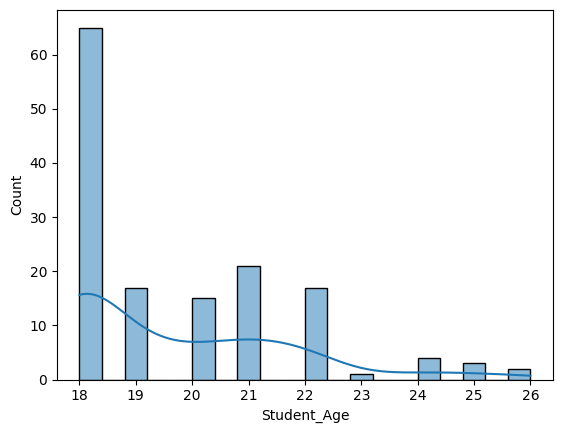

In [ ]:
#age - right skewed
sns.histplot(x='Student_Age', data=df, bins=20, kde=True)


<ipython-input-52-e88ec8110bd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Pearson Correlation of Features')

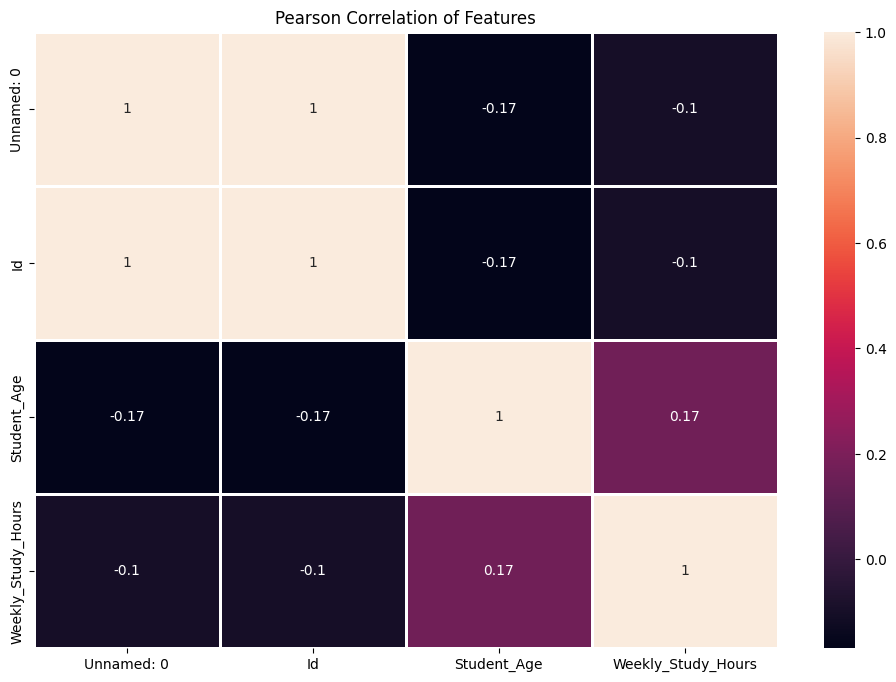

In [ ]:

#correlation of datset features
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, square=False, ax=ax, linewidth = 1)
plt.title('Pearson Correlation of Features')

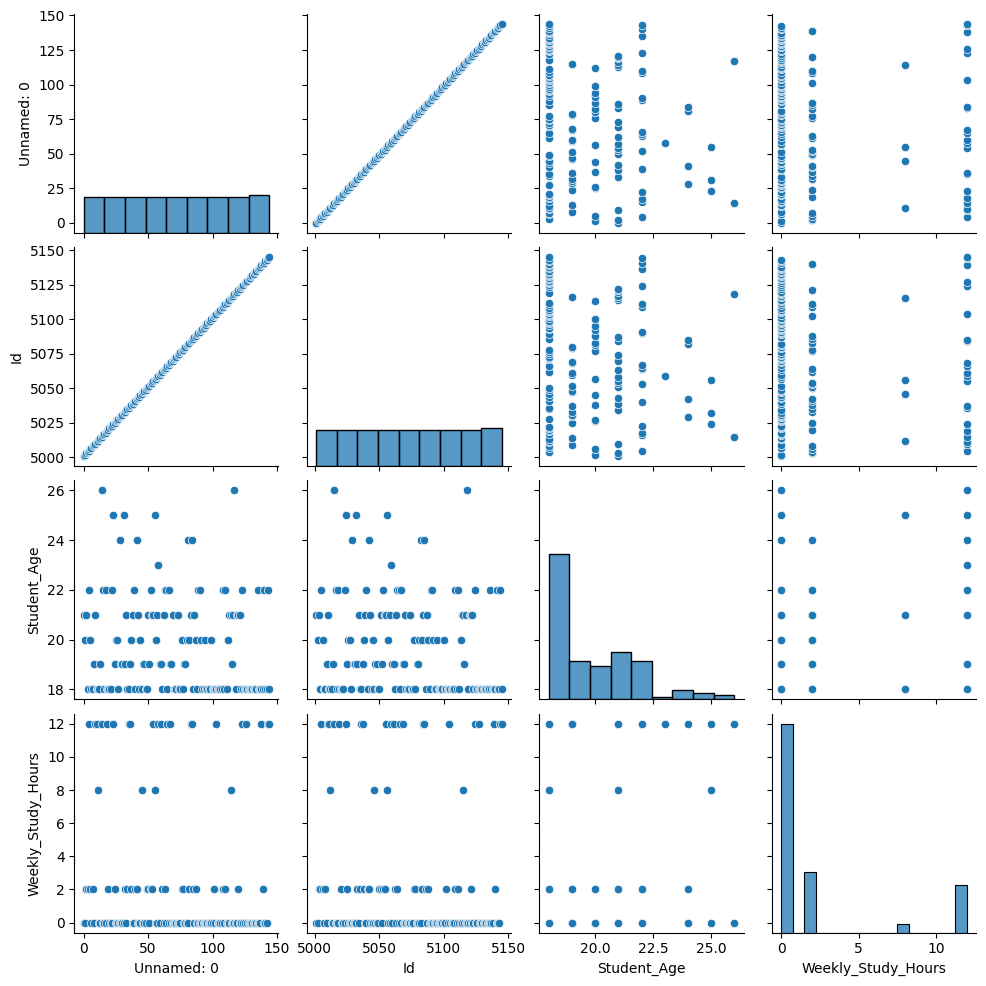

In [ ]:
g=sns.pairplot(df, diag_kind = 'auto')


# Prepping the Data for Binary Classification Model: Does Student Have Good Grades?
including feature engineering

In [ ]:
grade = df[["Grade", "Scholarship"]]
print(grade)

    Grade Scholarship
0      AA         50%
1      AA         50%
2      AA         50%
3      AA         50%
4      AA         50%
..    ...         ...
140    CC         50%
141    CC         75%
142    AA         75%
143    CB         75%
144    BB        100%

[145 rows x 2 columns]


In [ ]:
#GRADE AA BB AB = POSTIVE CLASS
#GRADE CC DD CB CD DE EE FF EF CF ... so on
#determining if student has good grades or not


# add a column for positive or negative based on good grade

df['Target'] = df['Grade'].apply(lambda c: 1 if (c == "AA" or c == "BB" or c == "BA") else 0)

print(df[["Grade","Target"]])

only_AB = df.loc[df['Grade'] == "BA"]
print(only_AB)



    Grade  Target
0      AA       1
1      AA       1
2      AA       1
3      AA       1
4      AA       1
..    ...     ...
140    CC       0
141    CC       0
142    AA       1
143    CB       0
144    BB       1

[145 rows x 2 columns]
0      False
1      False
2      False
3      False
4      False
       ...  
140    False
141    False
142    False
143    False
144    False
Name: Grade, Length: 145, dtype: bool
     Unnamed: 0    Id  Student_Age     Sex High_School_Type Scholarship  \
5             5  5006           20    Male            State         50%   
7             7  5008           18  Female            State         50%   
10           10  5011           18  Female          Private         50%   
14           14  5015           26    Male            State         75%   
15           15  5016           22    Male            State         50%   
17           17  5018           22    Male            State         50%   
18           18  5019           18  Female            

In [ ]:
#is data imbalanced? - no
df['Target'].value_counts()

1    80
0    65
Name: Target, dtype: int64

#  Pipelines for Automation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#column transformers
def make_coltrans():
    column_trans = ColumnTransformer(transformers=
            [('num', MinMaxScaler(), selector(dtype_exclude="object")),
             ('cat', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['Student_Age', 'Scholarship', 'Additional_Work', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work'])],
            remainder='drop')

    return column_trans

In [ ]:
def create_pipe(clf):
    '''creating a pipeline for a given classifier.  the classifier needs to be an instance
    of the classifier with all parmeters needed specified.'''

    # al the pipelines uses the same column transformer.
    column_trans = make_coltrans()

    pipeline = Pipeline([('prep',column_trans),
                         ('clf', clf)])

    return pipeline
#creating / fitting model

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
#X_train['CAT_FIELD_ONE'] = X_train['CAT_FIELD_TWO'].str[:1]
pipeline = create_pipe(clf)

# Fit the model to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c3d5c4f4580>),
                                                 ('cat',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['Student_Age', 'Scholarship',
                                                   'Additional_Work',
                                                   'Weekly_Study_Hours',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
head = df.head()
print(head)

   Unnamed: 0    Id  Student_Age     Sex High_School_Type Scholarship  \
0           0  5001           21    Male            Other         50%   
1           1  5002           20    Male            Other         50%   
2           2  5003           21    Male            State         50%   
3           3  5004           18  Female          Private         50%   
4           4  5005           22    Male          Private         50%   

  Additional_Work Sports_activity Transportation  Weekly_Study_Hours  \
0             Yes              No        Private                   0   
1             Yes              No        Private                   0   
2              No              No        Private                   2   
3             Yes              No            Bus                   2   
4              No              No            Bus                  12   

  Attendance Reading Notes Listening_in_Class Project_work Grade  Target  
0     Always     Yes   Yes                 No        

# Cross Validation

In [ ]:
#x - determining what data to use for the model as features
#features
X = df[['Student_Age', 'Scholarship', 'Additional_Work', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']]
#target variable
y = df['Target']

In [ ]:
#splitting the data
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 98)
'''


'\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 98)\n'

In [ ]:
models = {'LogReg' : LogisticRegression(random_state=42,class_weight='balanced', max_iter=500),
          'RandomForest' : RandomForestClassifier(class_weight='balanced', random_state=42)}

for name, model, in models.items():
    clf = model
    pipeline = create_pipe(clf)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    %time scores = cross_val_score(pipeline, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
    print(name, ': Mean f1 Weighted: %.3f and StdDev: (%.3f)' % \
        (np.mean(scores), np.std(scores)))

CPU times: user 78.7 ms, sys: 653 µs, total: 79.4 ms
Wall time: 708 ms
LogReg : Mean f1 Weighted: 0.655 and StdDev: (0.138)
CPU times: user 159 ms, sys: 18.2 ms, total: 177 ms
Wall time: 5.73 s
RandomForest : Mean f1 Weighted: 0.601 and StdDev: (0.129)


# Training Model!

In [ ]:
#test 20% - training 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [ ]:
def fit_and_print(pipeline, name):

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(metrics.classification_report(y_test, y_pred, digits=3))

    ConfusionMatrixDisplay.from_predictions(y_test,
                                            y_pred,
                                            cmap=plt.cm.YlOrBr)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.tight_layout()
    plt.savefig('classification_1.png', dpi=300)

              precision    recall  f1-score   support

           0      0.706     0.800     0.750        15
           1      0.750     0.643     0.692        14

    accuracy                          0.724        29
   macro avg      0.728     0.721     0.721        29
weighted avg      0.727     0.724     0.722        29



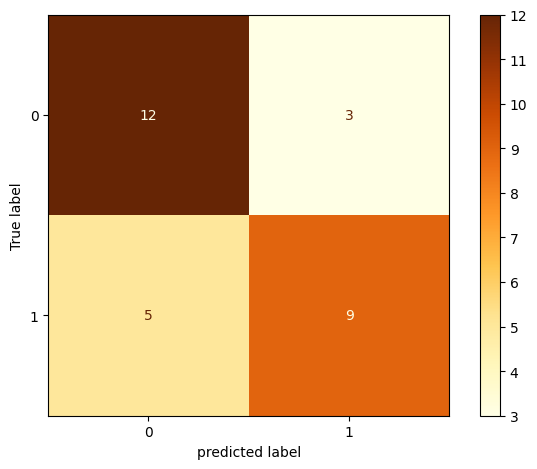

In [ ]:
clf = LogisticRegression(random_state=42,
                         class_weight='balanced',
                         max_iter=500)
pipeline = create_pipe(clf)
fit_and_print(pipeline, 'Logistic Regression')


In [ ]:
#persisting (saving) the model
# Save the model to disk
dump(pipeline, 'binary.joblib')

# Load the model from disk when you're ready to continue
pipeline = load('binary.joblib')